In [1]:
import torch
import torch.nn as nn
import torch_geometric
from src.layer.wavelet_weights import WaveletCoefs
from src.layer.encoders import TrigonometricEncoder

<Axes: >

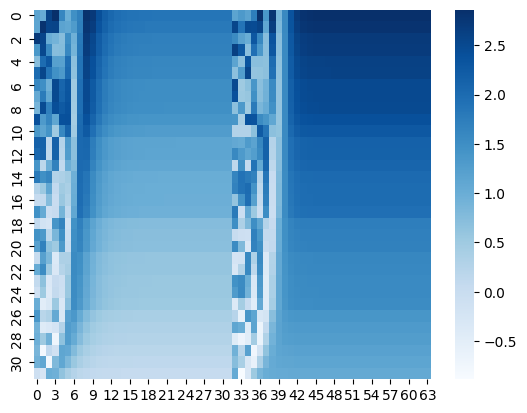

In [2]:
import numpy as np 
import seaborn as sns

eigvs = torch.tensor(np.random.uniform(0,2, (64, 32) ),
                      dtype=torch.float32).sort(
    axis=1,descending=True).values
d = 64

pe = TrigonometricEncoder(d, 100, project=False)
pos = pe(eigvs)
sns.heatmap(pos.detach()[0], cmap='Blues')

In [3]:
coefs_function = WaveletCoefs(d, 0.01, 4)

In [4]:
coefs = coefs_function(eigvs)

In [5]:
eigvs, Us = [], []
N = 32
B = 64
d = 16
for i in range(B):
    L = torch.randn((N,N))
    L = L@L.T
    eigv, U = torch.linalg.eigh(L)
    eigvs.append(eigv)
    Us.append(U)
eigvs = torch.stack(eigvs)
Us = torch.stack(Us)

J = 5
scale = torch.linspace(0.1, 10, J)
x = torch.randn((B, N, d))*0.1
eigvs = (2*eigvs/eigvs.max())


In [6]:
import torch 
import torch.nn as nn
from src.layer.waveconv import WaveConv

In [7]:
wconv = WaveConv(d, 0, 4, scale, K=6, J=5)
H = wconv(x, Us, eigvs)

In [8]:
H.shape

torch.Size([64, 32, 16])

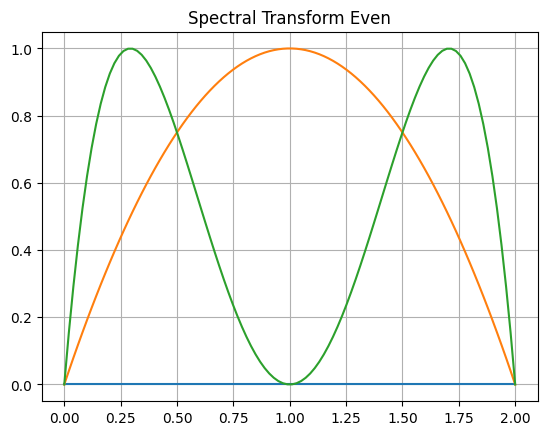

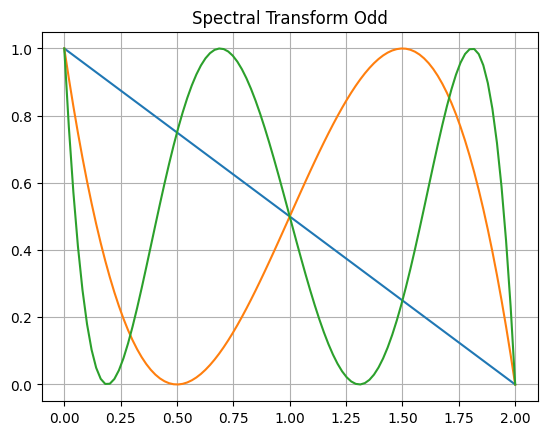

In [9]:
import matplotlib.pyplot as plt 

grid = torch.linspace(0, 2, 100)
cheb = wconv.get_transformed_chebyshev(grid)
T_even = cheb[::2]
T_odd = cheb[1::2]

plt.figure()
plt.title('Spectral Transform Even')
plt.plot(grid, T_even[0])
plt.plot(grid, T_even[1])
plt.plot(grid, T_even[2])
plt.grid()

plt.figure()
plt.title('Spectral Transform Odd')

plt.plot(grid, T_odd[0])
plt.plot(grid, T_odd[1])
plt.plot(grid, T_odd[2])
plt.grid();